In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sb
import numpy as np
import pickle
import matplotlib.pyplot
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
import mlflow
import mlflow.xgboost
import shap
import xgboost as xgb
from xgboost import XGBClassifier

In [11]:
shap.initjs()

In [12]:
df_train = pd.read_csv('../data/processed/train.csv')
df_test = pd.read_csv('../data/processed/test.csv')

In [13]:
X = df_train.drop(columns = ['TARGET'])
Y = df_train['TARGET']

df_test2 = df_test
X_train, X_test, y_train, y_test = train_test_split(X, Y)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(230633, 223) (76878, 223) (230633,) (76878,)


In [22]:
rand = X_train.sample(100, random_state=42)

In [15]:
XGB = XGBClassifier(objective='binary:logistic', eval_metric="logloss", use_label_encoder=False)
XGB.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='logloss',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              use_label_encoder=False, validate_parameters=1, verbosity=None)

In [16]:
explainer = shap.TreeExplainer(XGB)

In [24]:
shap_values = explainer.shap_values(rand)

In [18]:
shap_values = explainer.shap_values(X_test)

In [19]:
feature_names=X_train.columns.tolist()


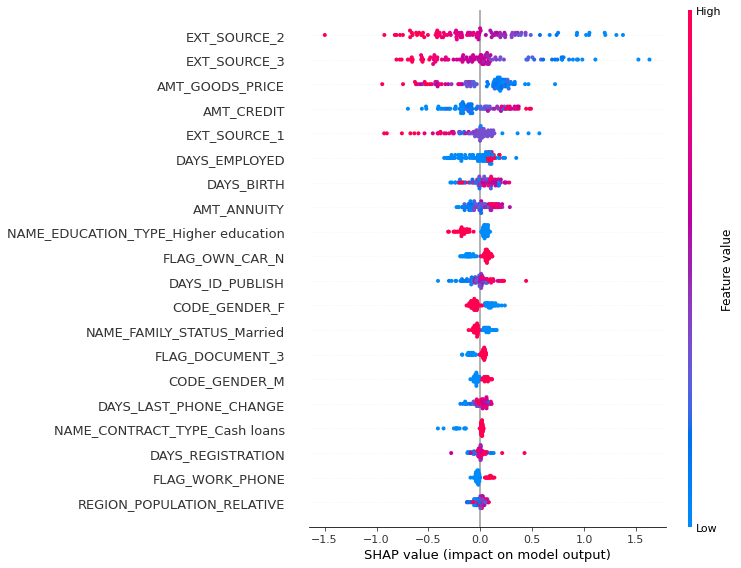

In [25]:
shap.summary_plot(shap_values,rand,feature_names= feature_names)

In [26]:
shap.force_plot(explainer.expected_value, shap_values[0,:], X_train.iloc[0,:])

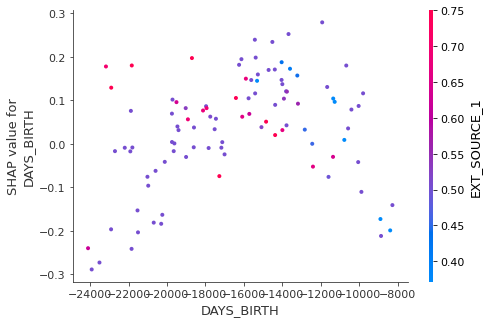

In [27]:
shap.dependence_plot("DAYS_BIRTH", shap_values, rand)